<a href="https://colab.research.google.com/github/theclosedbook/TensorFlow/blob/main/02_Neural_Netwrok_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

A classification is where you try to classify something as one thing or another

A few types of classificationproblems:
* Binary classificaton
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles (n_samples , noise = 0.03 , random_state = 42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"lablel":y})
circles

,X0,X1,lablel
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


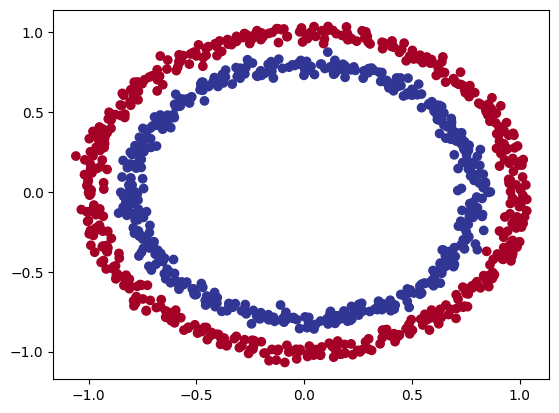

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Input and Output shapes

In [6]:
# Check the shapes of our features and labels
X.shape , y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Complie the model
3. Fit the model
4. Evaluate the model

In [9]:
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# compile the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics =['accuracy'])
# fit the model
model_1.fit(X,y,epochs = 5)

Epoch 1/5
32/32 [==============================] - 2s 7ms/step - loss: 6.3842 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 5.6093 - accuracy: 0.4590
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 5.2028 - accuracy: 0.5210
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 5.4082 - accuracy: 0.5560
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 5.4162 - accuracy: 0.5570


In [11]:
# Training for longer
model_1.fit(X,y,epochs = 200 , verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [12]:
# Adding an extra layer
# Set the random seed
tf.random.set_seed(42)
# Creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compilinf the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
# Fit the model
model_2.fit(X,y,epochs = 100, verbose=0)

In [13]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

### Improving the model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might to choose a different optimization function such as Adam instead of SGD
3. Fiting the model - perhaps we might fit our model for more epochs


In [14]:
# set the random seed
tf.random.set_seed(42)
# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
# Fit the model
model_3.fit(X,y,epochs = 100 ,verbose=0)

In [15]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5060


[0.698684811592102, 0.5059999823570251]

To visualize our model's predictions, lets create a function `plot_decision_boundary()` , this function will:

* Take in a trained model , features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np


In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


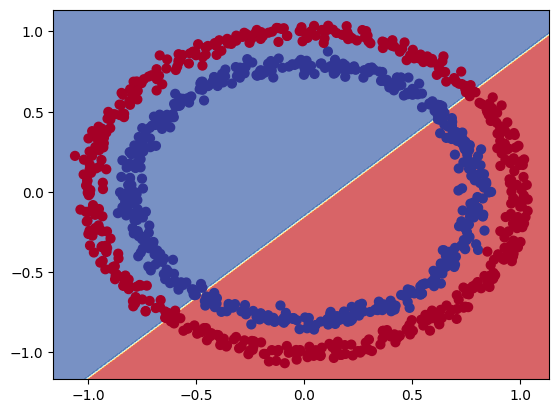

In [18]:
# Check out the predictions oof our model
plot_decision_boundary(model = model_3,X=X,y=y)

In [20]:
# Lets see if our model can be used for a regression model
# set random seed
tf.random.set_seed(42)
# create some regression data
X_regression = tf.range(0,1000,5)
y_regression =tf.range(100,1100,5)
#splitting data in trainnig and testing data set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [21]:
# Recreating the model for running regression model
# create the model
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compiling the model
model_reg.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['mae'])
# Fit the model
model_reg.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 6ms/step - loss: 233.2724 - mae: 233.2724
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 99.9125 - mae: 99.9125
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 57.7266 - mae: 57.7266
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 75.5915 - mae: 75.5915
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 51.0041 - mae: 51.0041
Epoch 6/200
5/5 [==============================] - 0s 6ms/step - loss: 49.3272 - mae: 49.3272
Epoch 7/200
5/5 [==============================] - 0s 6ms/step - loss: 44.2193 - mae: 44.2193
Epoch 8/200
5/5 [==============================] - 0s 6ms/step - loss: 46.0263 - mae: 46.0263
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 42.8520 - mae: 42.8520
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 43.9239 - mae: 43.9239
Epoch 11/200
5/5 [==============================] - 0s 5m

2/2 [==============================] - 0s 10ms/step


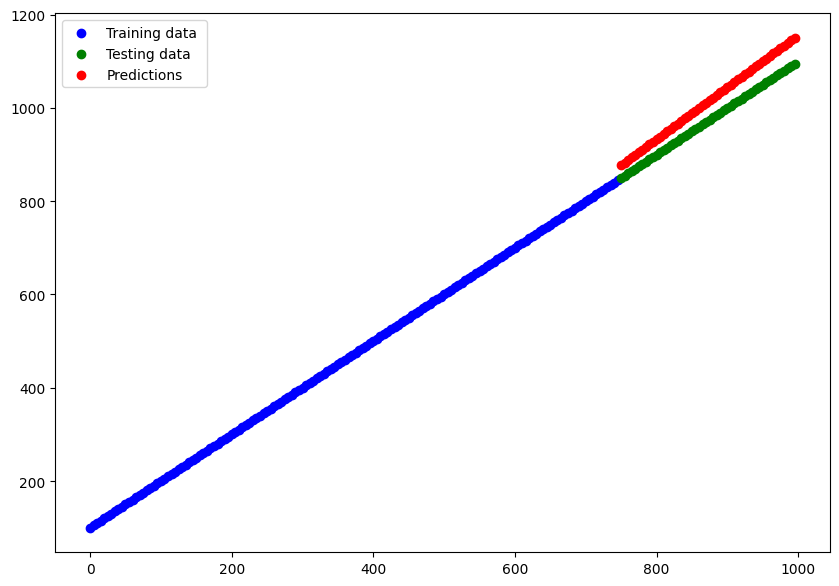

In [22]:
# Make prediction with our trained model
y_reg_preds = model_reg.predict(X_reg_test)

#Plot the models predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label = "Training data ")
plt.scatter(X_reg_test,y_reg_test,c='g',label = "Testing data")
plt.scatter(X_reg_test,y_reg_preds,c='r',label = "Predictions")
plt.legend()

### The missing piece is Non-Linearity

In [23]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.linear)
])
# Compiling the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr =0.001),
                metrics = ['accuracy'])
# Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 5.9889 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 5.9550 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9385 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9330 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9300 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 5.9278 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9255 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9234 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9213 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9199 - accuracy: 0.4800
Epoch 11/

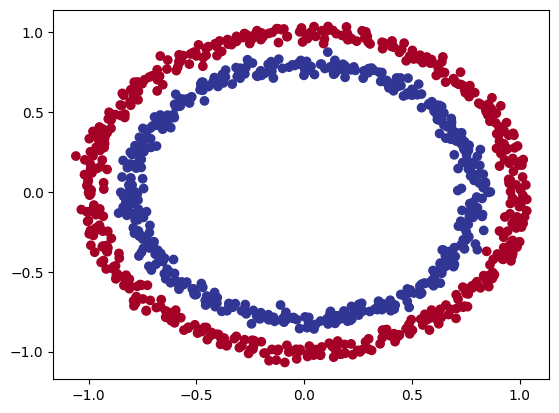

In [24]:
# Check our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


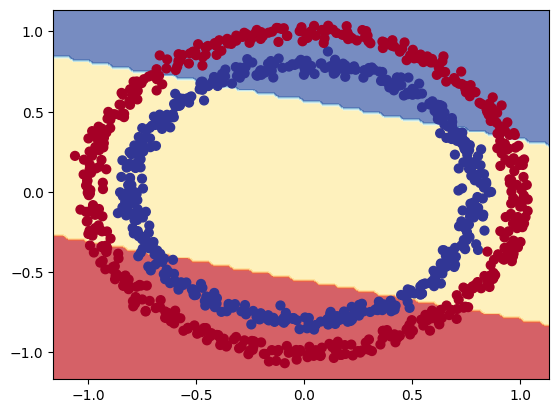

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

Building our models with non-linear activation functions.

In [26]:
# Set the random seed
tf.random.set_seed(42)
# Creating the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu)
])
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
# Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3355 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2629 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2428 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2358 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2205 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1938 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1744 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1221 - accuracy: 0.4680
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0610 - accuracy: 0.4700
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0015 - accuracy: 0.4710
Epoch 11/

In [27]:
# Set the random seed
tf.random.set_seed(42)
# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics =['accuracy'])
# Fit the model
history = model_6.fit(X,y,epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 1.6941 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 1.2704 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 1.1560 - accuracy: 0.4960
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0780 - accuracy: 0.4240
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0146 - accuracy: 0.4200
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9594 - accuracy: 0.4580
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9152 - accuracy: 0.4350
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8763 - accuracy: 0.4020
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.4270
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7870 - accuracy: 0.4380
Epoch 11/

In [28]:
# Evaluating the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9940


[0.04033765196800232, 0.9940000176429749]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


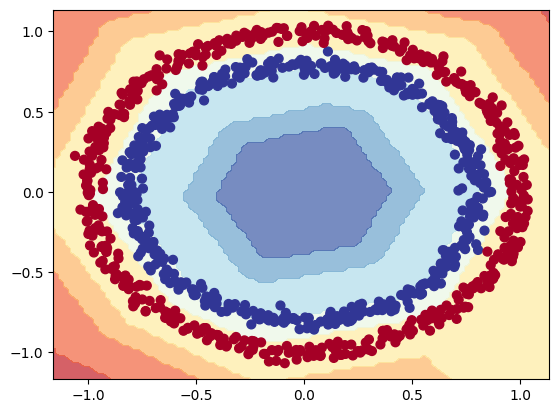

In [29]:
# Ploting the model predictions
plot_decision_boundary(model_6,X,y)

In [30]:
# Adding activation for output layer
# Set the random seed
tf.random.set_seed(42)
# Creating the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# Compiling the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
# Fit the model
model_7.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5130
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5170
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5190
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5170
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5400
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5700
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5910
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.5800
Epoch 11/

In [31]:
# Evaluating the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9940


[0.173463374376297, 0.9940000176429749]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


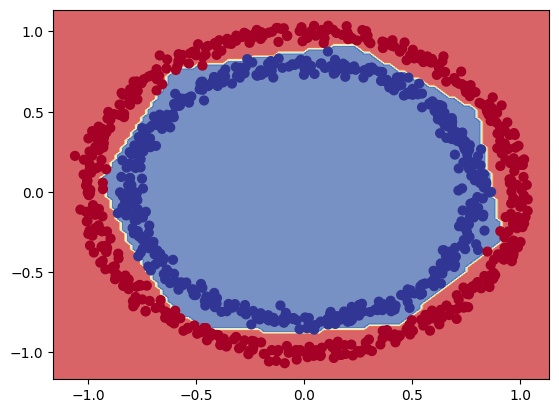

In [32]:
# Visualizing the model prediction
plot_decision_boundary(model = model_7, X=X,y=y)

In [33]:
# Create a toy tensor (simialr to the data we pass into our models )
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

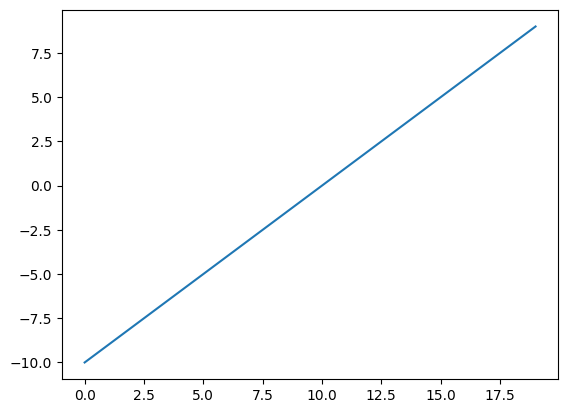

In [34]:
plt.plot(A)

In [35]:
# Lets start by replicating sigmoid - sigmoid(x) = 1 /(1+exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Using sigmoid on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

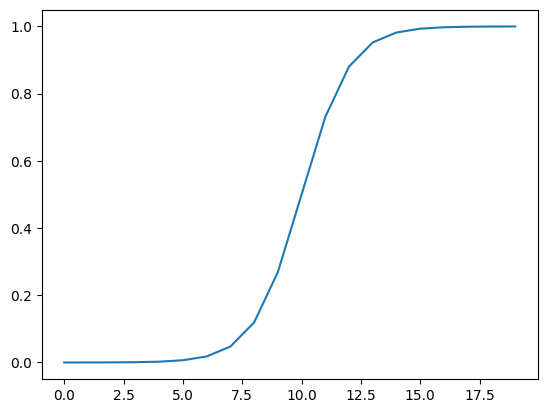

In [36]:
plt.plot(sigmoid(A))

In [37]:
# Lets recreate Relu Function
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

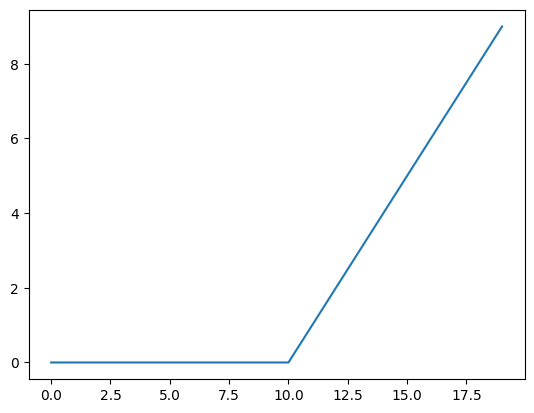

In [38]:
plt.plot(relu(A))

In [39]:
# Lets try the Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

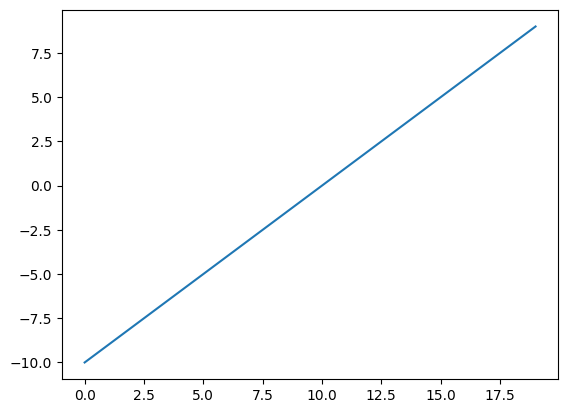

In [40]:
plt.plot(tf.keras.activations.linear(A))

In [41]:
# Creating training and testing dataset
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

In [65]:
# Set Random Seed
tf.random.set_seed(42)
# Creating the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# Compiling the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
# Fit the model
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.4512
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4925
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5337
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5462
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5663
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5813
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6212
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.6363
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6938
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7450
Epoch 11/25
25/25 [

In [66]:
# Evaluating the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.8650


[0.22688546776771545, 0.8650000095367432]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


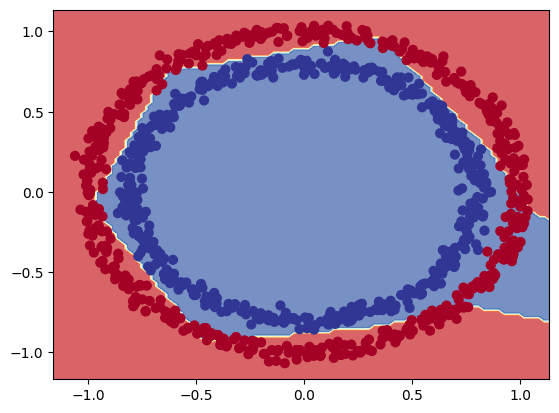

In [67]:
# Ploting the predictions
plot_decision_boundary(model = model_8,X=X,y=y)

Plot the loss (or training) curves

In [68]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.697726,0.45125
1,0.690984,0.49250
2,0.684605,0.53375
3,0.680237,0.54625
4,0.675273,0.56625
5,0.668660,0.58125
6,0.657962,0.62125
7,0.647577,0.63625
8,0.625171,0.69375
9,0.588365,0.74500


Text(0.5, 1.0, 'Model_8 Loss Curve')

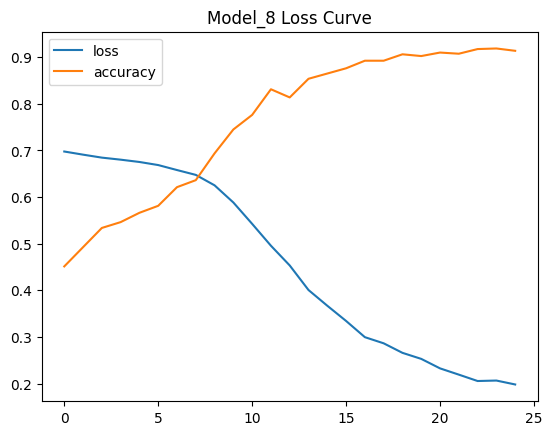

In [69]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curve")

## Finding the best learning rate

To find the ideal learning rate (the learning rate twhere the loss decreases the most during training) we're going to use the following steps:
* A learning rate **Callback** - you can think of a callback as an extra piece of functionallity, you can add to your *while* its training.
* Another model
* A modeified loss curve plot

In [59]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# Compiling the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
"""
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
                """
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [61]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6934507489204407, 0.4950000047683716]

<Axes: >

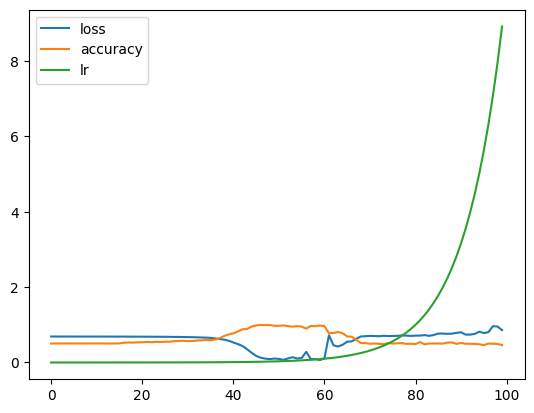

In [60]:
# Plot the loss curves
pd.DataFrame(history_9.history).plot()

Text(0.5, 1.0, 'Learning Rate vs Loss')

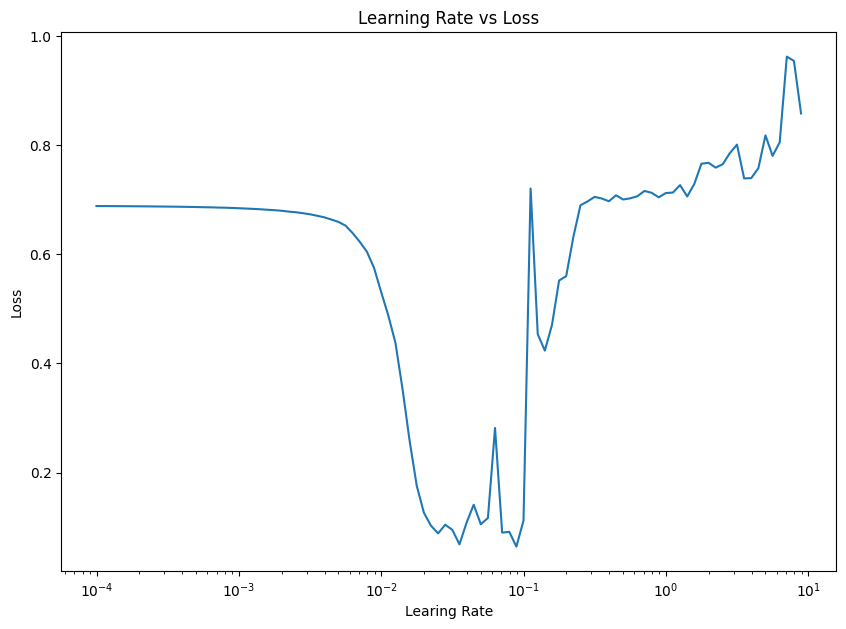

In [64]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learing Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [70]:
# Examples of other typical learning rates values:
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [76]:
# Set the random seed
tf.random.set_seed(42)
# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# Compiling the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])
# Fit the model
history_10 = model_10.fit(X_train,y_train,epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 4ms/step - loss: 0.6852 - accuracy: 0.5088
Epoch 2/150
25/25 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.5863
Epoch 3/150
25/25 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6025
Epoch 4/150
25/25 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.6775
Epoch 5/150
25/25 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.7200
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.7625
Epoch 7/150
25/25 [==============================] - 0s 4ms/step - loss: 0.5351 - accuracy: 0.8062
Epoch 8/150
25/25 [==============================] - 0s 4ms/step - loss: 0.4903 - accuracy: 0.8288
Epoch 9/150
25/25 [==============================] - 0s 4ms/step - loss: 0.4283 - accuracy: 0.9025
Epoch 10/150
25/25 [==============================] - 0s 4ms/step - loss: 0.3677 - accuracy: 0.9500
Epoch 11/

In [77]:
# Evaluating the model
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9850


[0.034087907522916794, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


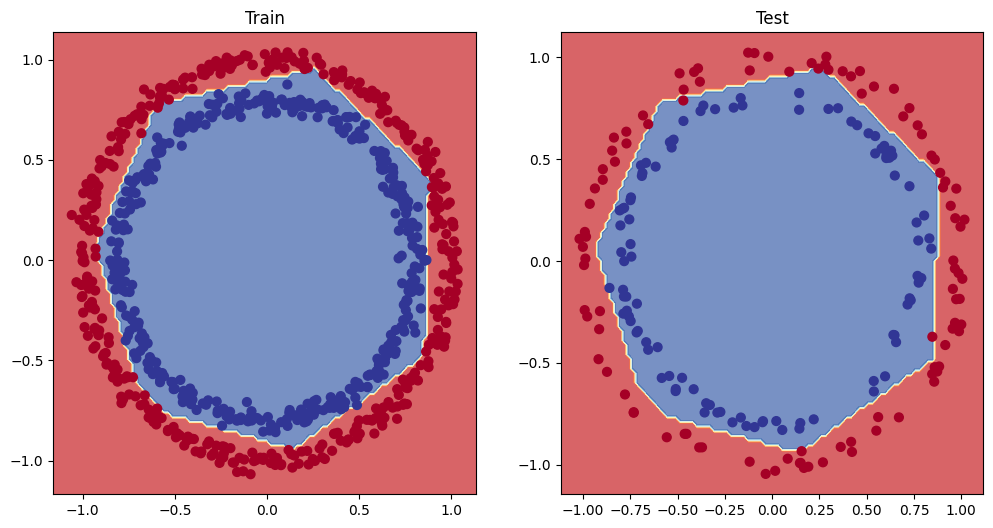

In [78]:
# Plot the decision boundaries for training and testing sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X_test,y_test)
plt.show()